# Preparation

In [1]:
#dataload
from data_utils import load_CIFAR_batch,load_CIFAR10,get_CIFAR10_data
import sys
sys.path += ['layers']
import numpy as np
from init_layers import init_layers
from init_model import init_model
from train import train 
from test import test
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
X_train, y_train, X_test, y_test = get_CIFAR10_data()

Train data shape:  (32, 32, 3, 50000)
Train labels shape:  (50000,)
Test data shape:  (32, 32, 3, 10000)
Test labels shape:  (10000,)


# Model 1

CONV(2, 3, 2)

POOL(2, 2)

RELU

FLATTEN

LINEAR(450, 10)

SOFTMAX

## Parameter Set 1

Learning Rate: 1e-3

Weight Decay: 1e-3

Batch Size: 128

In [3]:
l1 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 450,
                            'num_out': 10}),
    init_layers('softmax', {})]

model1 = init_model(l1, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(450,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


In [4]:
params =  {"learning_rate":1e-3,
            "weight_decay":1e-3,
            "batch_size":128,
            "save_file":'model1_p1.npz',
            "print_step" : 10}

model_result, train_accuracy, train_loss = train(model1, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.09375 	Loss:  2.3830101585262193
Iteration:  10 	Accuracy:  0.09375 	Loss:  2.329170258700768
Iteration:  20 	Accuracy:  0.1015625 	Loss:  2.3251713233761113
Iteration:  30 	Accuracy:  0.125 	Loss:  2.3555485594440815
Iteration:  40 	Accuracy:  0.125 	Loss:  2.3920352641434137
Iteration:  50 	Accuracy:  0.203125 	Loss:  2.2339508335229405
Iteration:  60 	Accuracy:  0.1328125 	Loss:  2.274511333230925
Iteration:  70 	Accuracy:  0.1484375 	Loss:  2.2813047281390175
Iteration:  80 	Accuracy:  0.171875 	Loss:  2.2493092297125763
Iteration:  90 	Accuracy:  0.296875 	Loss:  2.0920945235649078
Iteration:  100 	Accuracy:  0.140625 	Loss:  2.2111951415202085
Iteration:  110 	Accuracy:  0.1796875 	Loss:  2.1765633371994975
Iteration:  120 	Accuracy:  0.234375 	Loss:  2.1237195598202154
Iteration:  130 	Accuracy:  0.140625 	Loss:  2.2303756752898263
Iteration:  140 	Accuracy:  0.2265625 	Loss:  2.113862835722632
Iteration:  150 	Accuracy:  0.2421875 	Loss:  2.106124789

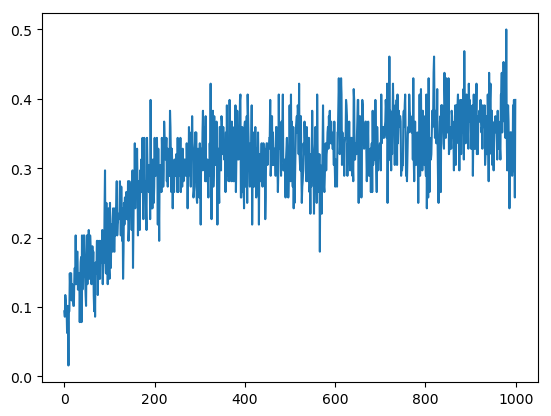

In [5]:
plt.plot(range(1000), train_accuracy, label='Accuracy')
plt.show()

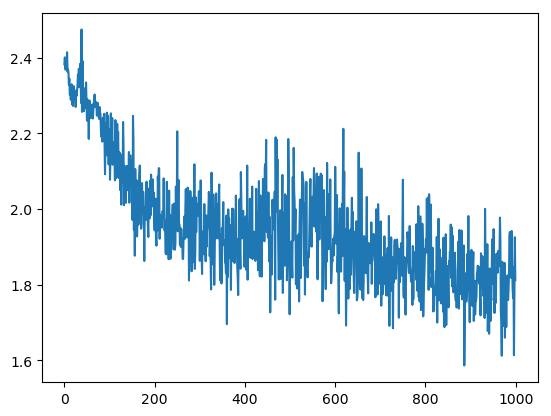

In [6]:
plt.plot(range(1000), train_loss, label='Loss')
plt.show()

In [7]:
test_accuracy, test_loss = test(model_result, X_test, y_test)
print(test_accuracy, test_loss)

0.3609 1.8390851049100096


## Parameter Set 2

Learning Rate: 1e-3

Weight Decay: 1e-4

Batch Size: 128

In [8]:
l1 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 450,
                            'num_out': 10}),
    init_layers('softmax', {})]

model1 = init_model(l1, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(450,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


In [9]:
params =  {"learning_rate":1e-3,
            "weight_decay":1e-4,
            "batch_size":128,
            "save_file":'model1_p2.npz',
            "print_step" : 10}

model_result, train_accuracy, train_loss = train(model1, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.09375 	Loss:  2.397115703167208
Iteration:  10 	Accuracy:  0.1171875 	Loss:  2.314910586580534
Iteration:  20 	Accuracy:  0.109375 	Loss:  2.328951822839234
Iteration:  30 	Accuracy:  0.1171875 	Loss:  2.2824990310020334
Iteration:  40 	Accuracy:  0.109375 	Loss:  2.2981411226191284
Iteration:  50 	Accuracy:  0.140625 	Loss:  2.2833716495206757
Iteration:  60 	Accuracy:  0.125 	Loss:  2.2539012337375306
Iteration:  70 	Accuracy:  0.1875 	Loss:  2.2190590177171323
Iteration:  80 	Accuracy:  0.1953125 	Loss:  2.1843012466763536
Iteration:  90 	Accuracy:  0.2109375 	Loss:  2.170668765399334
Iteration:  100 	Accuracy:  0.25 	Loss:  2.153902738338462
Iteration:  110 	Accuracy:  0.2265625 	Loss:  2.167480367655009
Iteration:  120 	Accuracy:  0.1015625 	Loss:  2.113394758601755
Iteration:  130 	Accuracy:  0.25 	Loss:  2.1576871950524446
Iteration:  140 	Accuracy:  0.234375 	Loss:  2.0610990435923715
Iteration:  150 	Accuracy:  0.2734375 	Loss:  2.112304183620453
It

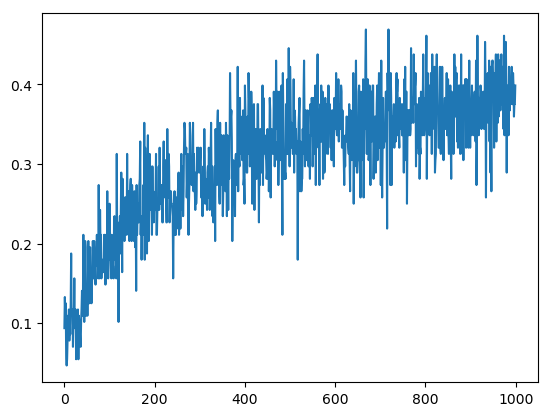

In [10]:
plt.plot(range(1000), train_accuracy, label='Accuracy')
plt.show()

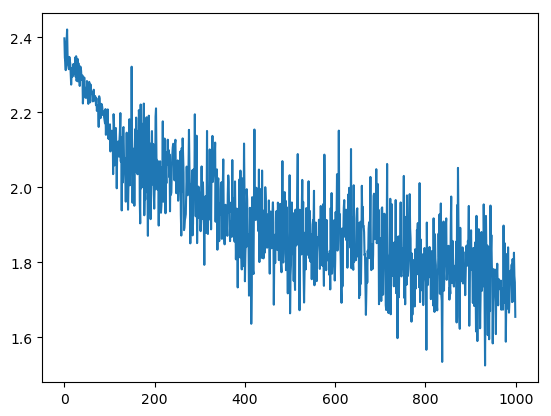

In [11]:
plt.plot(range(1000), train_loss, label='Loss')
plt.show()

In [12]:
test_accuracy, test_loss = test(model_result, X_test, y_test)
print(test_accuracy, test_loss)

0.3692 1.7861158692933714


# Model 2

CONV(2, 3, 2)

POOL(2, 2)

RELU

CONV(2, 2, 6)

POOL(2, 2)

RELU

FLATTEN

LINEAR(294, 10)

SOFTMAX

## Parameter Set 1

Learning Rate: 1e-3

Weight Decay: 1e-3

Batch Size: 128

In [21]:
l2 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('conv', {'filter_size': 2,
                        'filter_depth': 2,
                        'num_filters': 6}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 294,
                            'num_out': 10}),
    init_layers('softmax', {})]

model2 = init_model(l2, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(14, 14, 6)
Layer 4 output size: 
(7, 7, 6)
Layer 5 output size: 
(7, 7, 6)
Layer 6 output size: 
(294,)
Layer 7 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


In [23]:
params =  {"learning_rate":1e-3,
            "weight_decay":1e-3,
            "batch_size":128,
            "save_file":'model2_p1.npz',
            "print_step" : 10}

model_result, train_accuracy, train_loss = train(model2, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.296875 	Loss:  1.9577243445462513
Iteration:  10 	Accuracy:  0.3359375 	Loss:  2.0207426466375202
Iteration:  20 	Accuracy:  0.359375 	Loss:  1.820728090929206
Iteration:  30 	Accuracy:  0.375 	Loss:  1.8391738838705622
Iteration:  40 	Accuracy:  0.296875 	Loss:  2.0148164615692123
Iteration:  50 	Accuracy:  0.3515625 	Loss:  1.8726161074823635
Iteration:  60 	Accuracy:  0.2734375 	Loss:  1.9225852329718356
Iteration:  70 	Accuracy:  0.2578125 	Loss:  2.003251449271615
Iteration:  80 	Accuracy:  0.3203125 	Loss:  1.955353079311307
Iteration:  90 	Accuracy:  0.2890625 	Loss:  1.8930808865454507
Iteration:  100 	Accuracy:  0.4140625 	Loss:  1.803372983523823
Iteration:  110 	Accuracy:  0.265625 	Loss:  1.9244022872580877
Iteration:  120 	Accuracy:  0.328125 	Loss:  1.9856664644179165
Iteration:  130 	Accuracy:  0.3203125 	Loss:  1.8345943942207616
Iteration:  140 	Accuracy:  0.328125 	Loss:  1.8259229961259034
Iteration:  150 	Accuracy:  0.328125 	Loss:  1.829

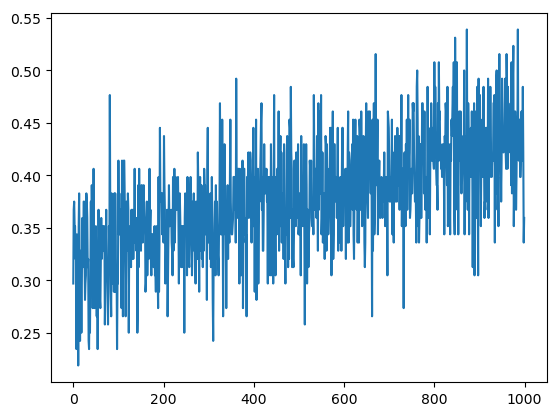

In [24]:
plt.plot(range(1000), train_accuracy, label='Accuracy')
plt.show()

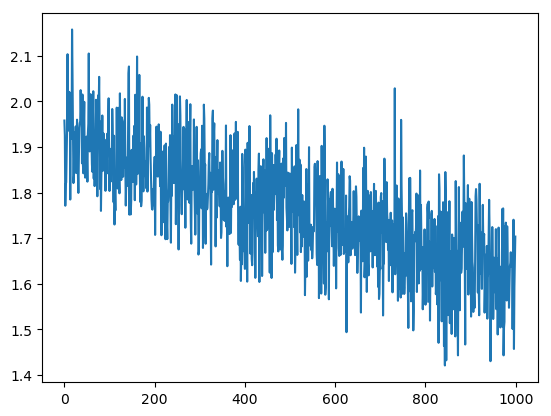

In [25]:
plt.plot(range(1000), train_loss, label='Loss')
plt.show()

In [26]:
test_accuracy, test_loss = test(model_result, X_test, y_test)
print(test_accuracy, test_loss)

0.4294 1.6295224464289746


## Parameter Set 2

Learning Rate: 1e-3

Weight Decay: 1e-4

Batch Size: 128

In [27]:
l2 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('conv', {'filter_size': 2,
                        'filter_depth': 2,
                        'num_filters': 6}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 294,
                            'num_out': 10}),
    init_layers('softmax', {})]

model2 = init_model(l2, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(14, 14, 6)
Layer 4 output size: 
(7, 7, 6)
Layer 5 output size: 
(7, 7, 6)
Layer 6 output size: 
(294,)
Layer 7 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


In [28]:
params =  {"learning_rate":1e-3,
            "weight_decay":1e-4,
            "batch_size":128,
            "save_file":'model2_p2.npz',
            "print_step" : 10}

model_result, train_accuracy, train_loss = train(model2, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.09375 	Loss:  2.345856017161825
Iteration:  10 	Accuracy:  0.0859375 	Loss:  2.3341097486336926
Iteration:  20 	Accuracy:  0.140625 	Loss:  2.2984947773446107
Iteration:  30 	Accuracy:  0.09375 	Loss:  2.2965703064959504
Iteration:  40 	Accuracy:  0.109375 	Loss:  2.3013806957102347
Iteration:  50 	Accuracy:  0.0703125 	Loss:  2.2910329375962997
Iteration:  60 	Accuracy:  0.125 	Loss:  2.2867218262995586
Iteration:  70 	Accuracy:  0.1484375 	Loss:  2.269010866762681
Iteration:  80 	Accuracy:  0.109375 	Loss:  2.261392448254408
Iteration:  90 	Accuracy:  0.125 	Loss:  2.2911068025045447
Iteration:  100 	Accuracy:  0.0859375 	Loss:  2.2756597957488536
Iteration:  110 	Accuracy:  0.1640625 	Loss:  2.2932337093047135
Iteration:  120 	Accuracy:  0.140625 	Loss:  2.2652356108568723
Iteration:  130 	Accuracy:  0.140625 	Loss:  2.260951591860362
Iteration:  140 	Accuracy:  0.140625 	Loss:  2.2596000532359897
Iteration:  150 	Accuracy:  0.140625 	Loss:  2.26674759847

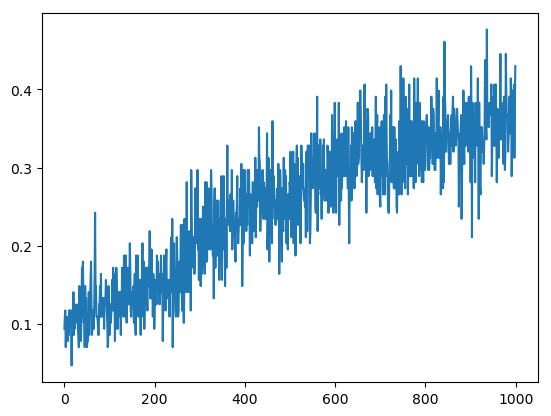

In [29]:
plt.plot(range(1000), train_accuracy, label='Accuracy')
plt.show()

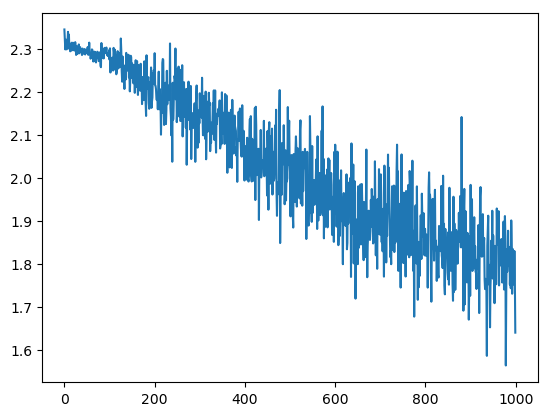

In [30]:
plt.plot(range(1000), train_loss, label='Loss')
plt.show()

In [31]:
test_accuracy, test_loss = test(model_result, X_test, y_test)
print(test_accuracy, test_loss)

0.3658 1.8079192775820008


# Model 3

CONV(2, 3, 2)

POOL(2, 2)

RELU

CONV(2, 2, 4)

POOL(2, 2)

RELU

CONV(2, 4, 8)

RELU

FLATTEN

LINEAR(72, 10)

SOFTMAX

## Parameter Set 1

Learning Rate: 1e-3

Weight Decay: 1e-3

Batch Size: 128

In [43]:
l3 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('conv', {'filter_size': 2,
                        'filter_depth': 2,
                        'num_filters': 4}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('conv', {'filter_size': 2,
                        'filter_depth': 4,
                        'num_filters': 8}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 288,
                            'num_out': 10}),    
    init_layers('softmax', {})]

model3 = init_model(l3, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(14, 14, 4)
Layer 4 output size: 
(7, 7, 4)
Layer 5 output size: 
(7, 7, 4)
Layer 6 output size: 
(6, 6, 8)
Layer 7 output size: 
(3, 3, 8)
Layer 8 output size: 
(3, 3, 8)
Layer 9 output size: 
(72,)
Layer 10 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


In [42]:
params =  {"learning_rate":1e-3,
            "weight_decay":1e-3,
            "batch_size":128,
            "save_file":'model3_p1.npz',
            "print_step" : 10}

model_result, train_accuracy, train_loss = train(model3, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.09375 	Loss:  2.3051859429990147
Iteration:  10 	Accuracy:  0.0703125 	Loss:  2.3029365504347235
Iteration:  20 	Accuracy:  0.0546875 	Loss:  2.30267905557477
Iteration:  30 	Accuracy:  0.0625 	Loss:  2.3028610266629657
Iteration:  40 	Accuracy:  0.1015625 	Loss:  2.301903151658647
Iteration:  50 	Accuracy:  0.1015625 	Loss:  2.303033197438965
Iteration:  60 	Accuracy:  0.078125 	Loss:  2.3041123151724094
Iteration:  70 	Accuracy:  0.09375 	Loss:  2.3015025573824164
Iteration:  80 	Accuracy:  0.0859375 	Loss:  2.302093858397225
Iteration:  90 	Accuracy:  0.0703125 	Loss:  2.3026899321086014
Iteration:  100 	Accuracy:  0.09375 	Loss:  2.302346472357123
Iteration:  110 	Accuracy:  0.09375 	Loss:  2.3021972558936348
Iteration:  120 	Accuracy:  0.1640625 	Loss:  2.300577677331587
Iteration:  130 	Accuracy:  0.0625 	Loss:  2.3030339937067046
Iteration:  140 	Accuracy:  0.0625 	Loss:  2.302755131753838
Iteration:  150 	Accuracy:  0.0625 	Loss:  2.3022669506141975


KeyboardInterrupt: 

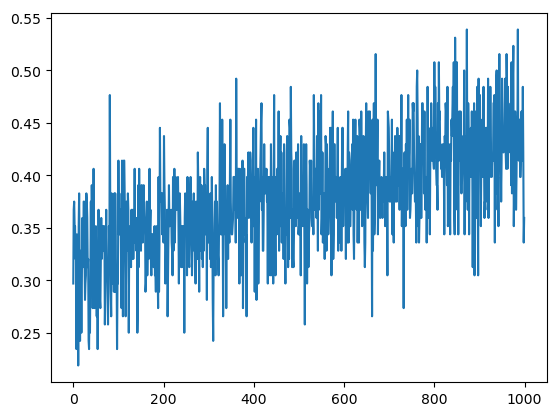

In [ ]:
plt.plot(range(1000), train_accuracy, label='Accuracy')
plt.show()

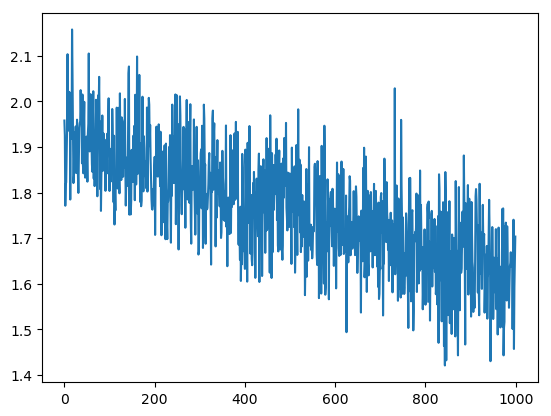

In [ ]:
plt.plot(range(1000), train_loss, label='Loss')
plt.show()

In [ ]:
test_accuracy, test_loss = test(model_result, X_test, y_test)
print(test_accuracy, test_loss)

0.4294 1.6295224464289746


## Parameter Set 2

Learning Rate: 1e-3

Weight Decay: 1e-4

Batch Size: 128

In [ ]:
l3 = [init_layers('conv', {'filter_size': 2,
                        'filter_depth': 3,
                        'num_filters': 2}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('conv', {'filter_size': 2,
                        'filter_depth': 2,
                        'num_filters': 4}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('conv', {'filter_size': 2,
                        'filter_depth': 4,
                        'num_filters': 8}),
    init_layers('pool', {'filter_size': 2,
                        'stride': 2}),
    init_layers('relu', {}),
    init_layers('flatten', {}),
    init_layers('linear', {'num_in': 72,
                            'num_out': 10}),    
    init_layers('softmax', {})]

model3 = init_model(l3, [32, 32, 3], 10, True)

Input size:
[32, 32, 3]
Layer 0 output size: 
(31, 31, 2)
Layer 1 output size: 
(15, 15, 2)
Layer 2 output size: 
(15, 15, 2)
Layer 3 output size: 
(14, 14, 6)
Layer 4 output size: 
(7, 7, 6)
Layer 5 output size: 
(7, 7, 6)
Layer 6 output size: 
(294,)
Layer 7 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


In [ ]:
params =  {"learning_rate":1e-3,
            "weight_decay":1e-4,
            "batch_size":128,
            "save_file":'model3_p2.npz',
            "print_step" : 10}

model_result, train_accuracy, train_loss = train(model3, X_train, y_train, params, numIters=1000)

Iteration:  0 	Accuracy:  0.09375 	Loss:  2.345856017161825
Iteration:  10 	Accuracy:  0.0859375 	Loss:  2.3341097486336926
Iteration:  20 	Accuracy:  0.140625 	Loss:  2.2984947773446107
Iteration:  30 	Accuracy:  0.09375 	Loss:  2.2965703064959504
Iteration:  40 	Accuracy:  0.109375 	Loss:  2.3013806957102347
Iteration:  50 	Accuracy:  0.0703125 	Loss:  2.2910329375962997
Iteration:  60 	Accuracy:  0.125 	Loss:  2.2867218262995586
Iteration:  70 	Accuracy:  0.1484375 	Loss:  2.269010866762681
Iteration:  80 	Accuracy:  0.109375 	Loss:  2.261392448254408
Iteration:  90 	Accuracy:  0.125 	Loss:  2.2911068025045447
Iteration:  100 	Accuracy:  0.0859375 	Loss:  2.2756597957488536
Iteration:  110 	Accuracy:  0.1640625 	Loss:  2.2932337093047135
Iteration:  120 	Accuracy:  0.140625 	Loss:  2.2652356108568723
Iteration:  130 	Accuracy:  0.140625 	Loss:  2.260951591860362
Iteration:  140 	Accuracy:  0.140625 	Loss:  2.2596000532359897
Iteration:  150 	Accuracy:  0.140625 	Loss:  2.26674759847

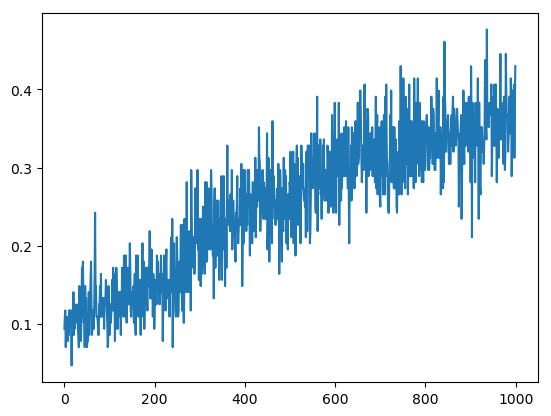

In [ ]:
plt.plot(range(1000), train_accuracy, label='Accuracy')
plt.show()

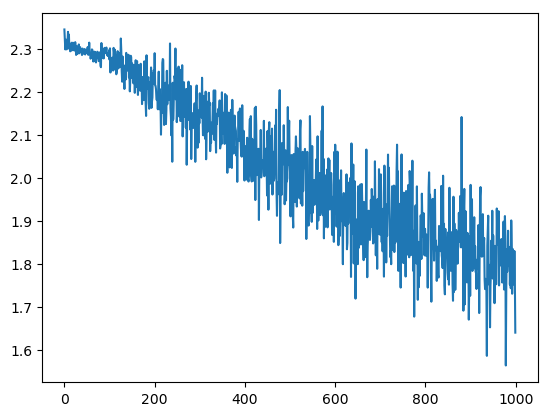

In [ ]:
plt.plot(range(1000), train_loss, label='Loss')
plt.show()

In [ ]:
test_accuracy, test_loss = test(model_result, X_test, y_test)
print(test_accuracy, test_loss)

0.3658 1.8079192775820008
